In [29]:
import ae
import tensorflow as tf
import os
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from audioop import rms
from matplotlib.pyplot import ylabel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
def testset(test_path, model, dmg=False):
    ae_test = ae.autoEncoder()
    data = []
    names = []
    imgHeight = 48
    imgWidth = 48
    imgChannel = 3
    img_shape = (imgHeight, imgWidth, imgChannel)
    ts_db = os.path.join(test_path)
    for img in os.listdir(ts_db):
        image = Image.open(os.path.join(ts_db, img)).convert('RGB')
        image = image.resize((imgHeight,imgWidth))
        image = np.array(image)
        image = image/255.0
        data.append(image)
        if dmg:
            names.append(img)
    test_data = np.array(data)
    gen = model.predict(test_data)
    tensor_test = tf.convert_to_tensor(test_data, dtype=tf.float32)
    ssim_vals = []
    psnr_vals = []
    rmse_vals = []
    mre_vals = []
    for i in range(len(test_data)):
        ssim_val = ae_test.compMetric(tensor_test[i], gen[i], "SSIM")
        psnr_val = ae_test.compMetric(tensor_test[i], gen[i], "PSNR")
        rmse_val = ae_test.compMetric(tensor_test[i], gen[i], "RMSE")
        mre_val = ae_test.compMetric(tensor_test[i], gen[i], "MRE")

        ssim_vals.append(ssim_val)
        psnr_vals.append(psnr_val/255.0)
        rmse_vals.append(rmse_val)
        mre_vals.append(mre_val)

        if dmg:
            print('Image',names[i],'ssim: ',float(ssim_val),' psnr: ', float(psnr_val/255.0), ' rmse: ', float(rmse_val), ' mre: ', mre_val)

    if dmg == False:
        print("#Instances: ", len(ssim_vals))
    return ssim_vals, psnr_vals, rmse_vals, mre_vals

def visualize(ssim_vals, psnr_vals, rmse_vals, mre_vals, sign):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('Image Comparison Metrics Distributions of Sign '+sign)


    ax = sns.distplot(ssim_vals, hist=True, kde=True, ax=axes[0,0],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'SSIM Distance', ylabel = "#Instances")
    std_ssim = np.std(ssim_vals)
    mean_ssim = np.mean(ssim_vals)
    print("mean: ", mean_ssim, " std: ", std_ssim)
    ax.axvline(std_ssim+mean_ssim)


    ax = sns.distplot(psnr_vals, hist=True, kde=True, ax=axes[0,1],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'PSNR Distance', ylabel = "#Instances")

    ax = sns.distplot(rmse_vals, hist=True, kde=True, ax=axes[1,0],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'RMSE Distance', ylabel = "#Instances")

    ax = sns.distplot(mre_vals, hist=True, kde=True, ax=axes[1,1],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'MRE Distance', ylabel = "#Instances")



In [34]:
weight_file_cropped_all = "/home/can/thesis/ae_weights/cropped_allfullmodel1mse.h5"
ae_cropped_all = ae.autoEncoder()
model_cropped_all= ae_cropped_all.loadModel(weight_file_cropped_all)

test_path1 = "/home/can/thesis/gtsrb/damaged_signs/1/healthy/"
test_path9 = "/home/can/thesis/gtsrb/damaged_signs/9/healthy/"
test_path14 = "/home/can/thesis/gtsrb/damaged_signs/14/healthy/"
test_path17 = "/home/can/thesis/gtsrb/damaged_signs/17/healthy/"
test_path25 = "/home/can/thesis/gtsrb/damaged_signs/25/healthy/"
test_path39 = "/home/can/thesis/gtsrb/damaged_signs/39/healthy/"

test_path1_dmg = "/home/can/thesis/gtsrb/damaged_signs/1/dmg/"
test_path9_dmg = "/home/can/thesis/gtsrb/damaged_signs/9/dmg/"
test_path14_dmg = "/home/can/thesis/gtsrb/damaged_signs/14/dmg/"
test_path17_dmg = "/home/can/thesis/gtsrb/damaged_signs/17/dmg/"
test_path25_dmg = "/home/can/thesis/gtsrb/damaged_signs/25/dmg/"
test_path39_dmg = "/home/can/thesis/gtsrb/damaged_signs/39/dmg/"

Destructor called, Employee deleted.


23/23 [==============================] - 0s 3ms/step
#Instances:  720
Destructor called, Employee deleted.
mean:  0.11927185137238767  std:  0.06287649194266119
1/1 [==============================] - 0s 14ms/step
Image 5.png ssim:  0.5771466791629791  psnr:  0.24524943033854166  rmse:  0.1903749257326126  mre:  1.0237849
Image 0.png ssim:  0.5012859404087067  psnr:  0.23785532035079657  rmse:  0.23652926087379456  mre:  1.1281636
Image 4.png ssim:  0.258622407913208  psnr:  0.2690205592735141  rmse:  0.09473884105682373  mre:  0.20862392
Image 3.png ssim:  0.520945817232132  psnr:  0.2541022207222733  rmse:  0.14680355787277222  mre:  0.4791218
Image 1.png ssim:  0.3584797978401184  psnr:  0.2577708225624234  rmse:  0.1318141669034958  mre:  0.23352185
Image 6.png ssim:  0.40648168325424194  psnr:  0.25892851586435356  rmse:  0.1274094432592392  mre:  0.28366664
Image 2.png ssim:  0.6280196011066437  psnr:  0.2516070197610294  rmse:  0.1579611599445343  mre:  0.58222127
Destructor call

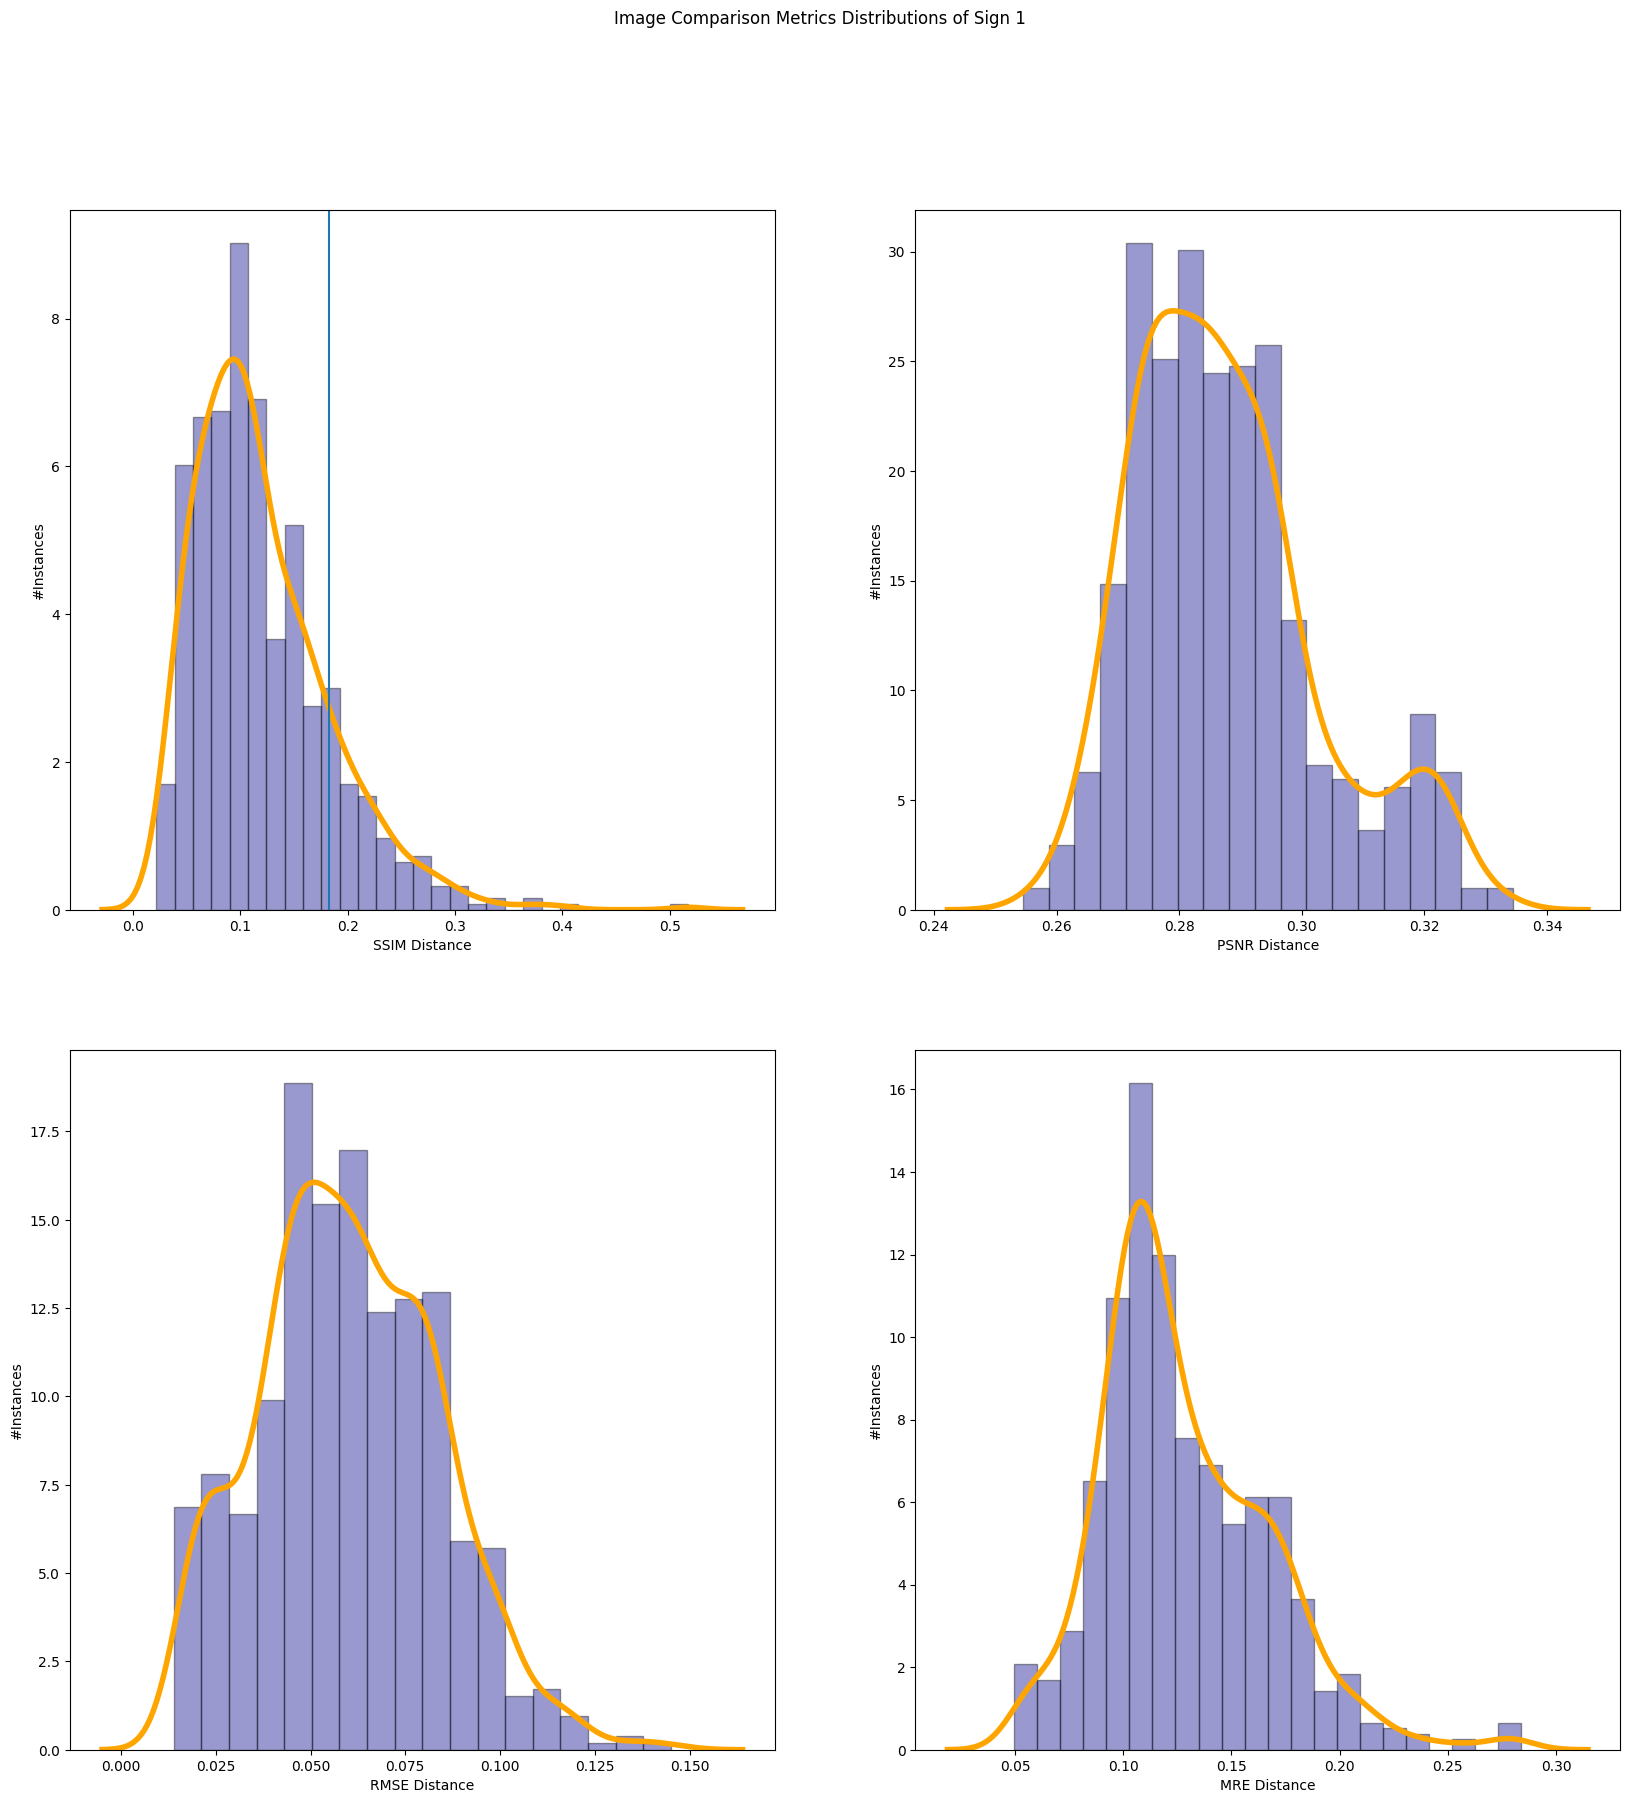

In [37]:
ssim1, psnr1, rmse1, mre1 = testset(test_path1, model_cropped_all)
visualize(ssim1, psnr1, rmse1, mre1, "1")
_,_,_,_ = testset(test_path1_dmg, model_cropped_all,True)


15/15 [==============================] - 0s 3ms/step
#Instances:  480
Destructor called, Employee deleted.
mean:  0.11968402750790119  std:  0.07379358181379687
1/1 [==============================] - 0s 14ms/step
Image 0.png ssim:  0.4873034358024597  psnr:  0.25531735887714463  rmse:  0.14165879786014557  mre:  0.30653307
Image 1.png ssim:  0.6276756823062897  psnr:  0.25450906192555145  rmse:  0.14506062865257263  mre:  0.48034886
Image 2.png ssim:  0.5471613705158234  psnr:  0.24992479810527726  rmse:  0.1659582406282425  mre:  0.4543467
Destructor called, Employee deleted.


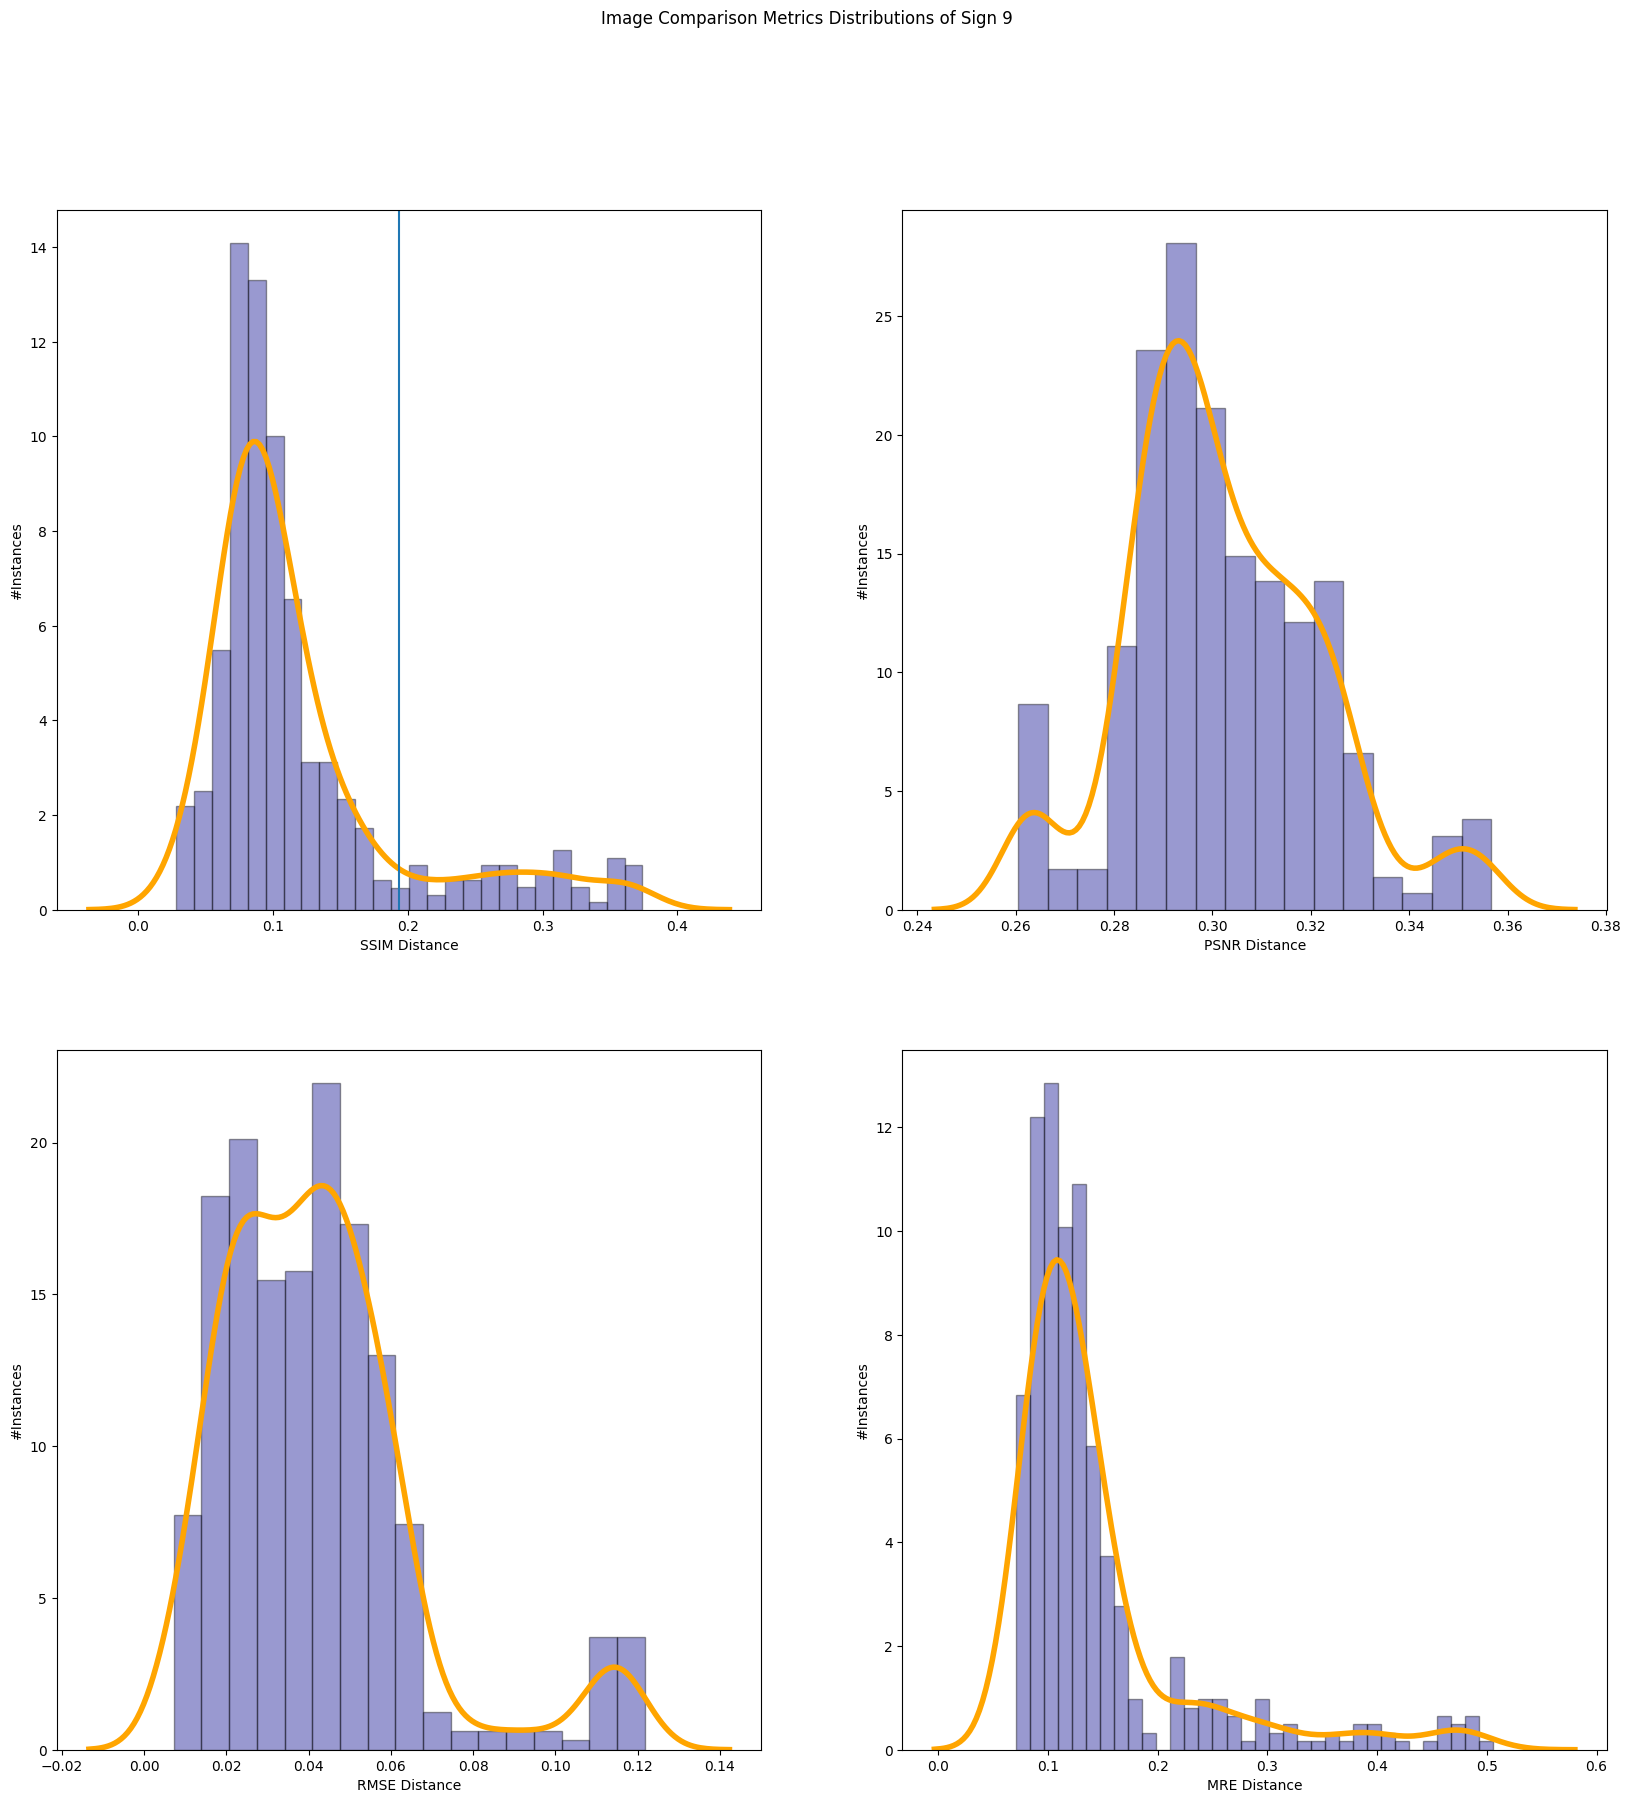

In [38]:
ssim9, psnr9, rmse9, mre9 = testset(test_path9, model_cropped_all)
visualize(ssim9, psnr9, rmse9, mre9,"9")
_,_,_,_ = testset(test_path9_dmg, model_cropped_all,True)

9/9 [==============================] - 0s 10ms/step
#Instances:  270
Destructor called, Employee deleted.
mean:  0.18265229507728858  std:  0.09465374011855017
1/1 [==============================] - 0s 69ms/step
Image 11.png ssim:  0.49165576696395874  psnr:  0.265247330011106  rmse:  0.10583679378032684  mre:  0.17772625
Image 5.png ssim:  0.33677762746810913  psnr:  0.25223215140548405  rmse:  0.15508873760700226  mre:  0.49165648
Image 7.png ssim:  0.3945104479789734  psnr:  0.259244582232307  rmse:  0.12623266875743866  mre:  0.26215625
Image 0.png ssim:  0.5239906311035156  psnr:  0.2524038277420343  rmse:  0.15430893003940582  mre:  1.4401889
Image 4.png ssim:  0.47746914625167847  psnr:  0.25381451775045955  rmse:  0.14804880321025848  mre:  0.5008242
Image 10.png ssim:  0.6688247621059418  psnr:  0.2436436372644761  rmse:  0.19956472516059875  mre:  0.554407
Image 3.png ssim:  0.5649439096450806  psnr:  0.25445269416360294  rmse:  0.14530080556869507  mre:  0.18433215
Image 1.p

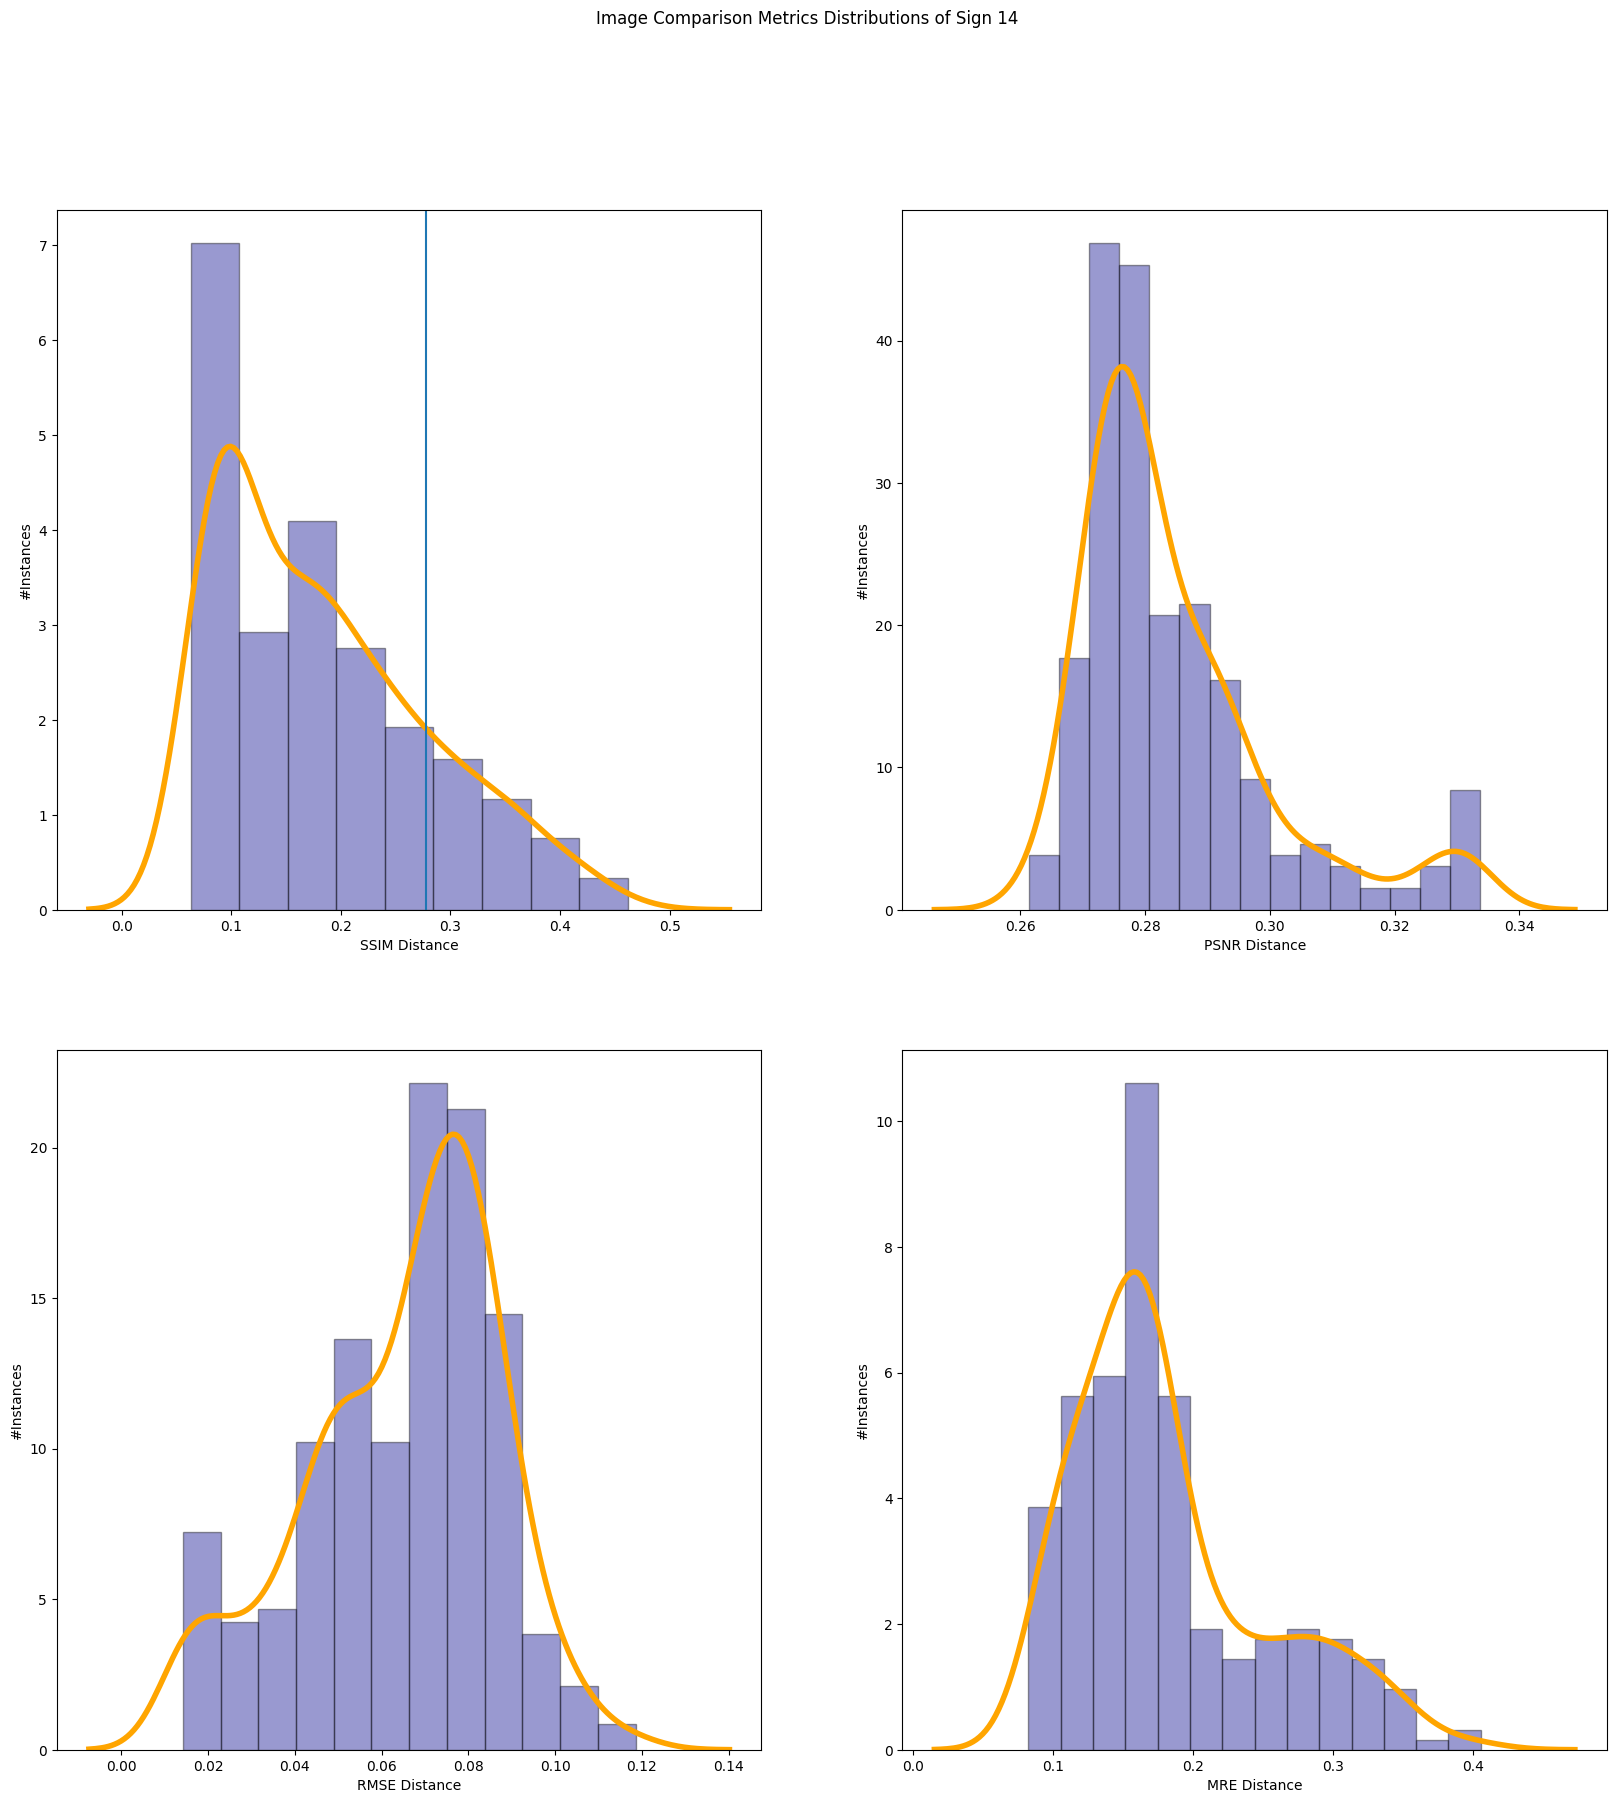

In [39]:
ssim14, psnr14, rmse14, mre14 = testset(test_path14, model_cropped_all)
visualize(ssim14, psnr14, rmse14, mre14,"14")
_,_,_,_ = testset(test_path14_dmg, model_cropped_all,True)

12/12 [==============================] - 0s 8ms/step
#Instances:  360
Destructor called, Employee deleted.
mean:  0.17619814210467868  std:  0.07323149629480437
1/1 [==============================] - 0s 64ms/step
Image 5.png ssim:  0.42700308561325073  psnr:  0.26590232101141237  rmse:  0.1038210466504097  mre:  0.2121709
Image 7.png ssim:  0.4899646043777466  psnr:  0.2548022101907169  rmse:  0.14381757378578186  mre:  0.6257188
Image 1.jpg ssim:  0.7274129390716553  psnr:  0.24803433885761336  rmse:  0.17542938888072968  mre:  1.1173528
Image 4.png ssim:  0.5548281669616699  psnr:  0.2540669459922641  rmse:  0.1469557285308838  mre:  0.43801638
Image 0.jpg ssim:  0.5867287218570709  psnr:  0.2550657683727788  rmse:  0.14270907640457153  mre:  0.38434643
Image 2.jpg ssim:  0.6583291292190552  psnr:  0.249347671807981  rmse:  0.16879409551620483  mre:  0.31672388
Image 3.jpg ssim:  0.49755239486694336  psnr:  0.26832161697686885  rmse:  0.09670284390449524  mre:  0.24470025
Image 6.png

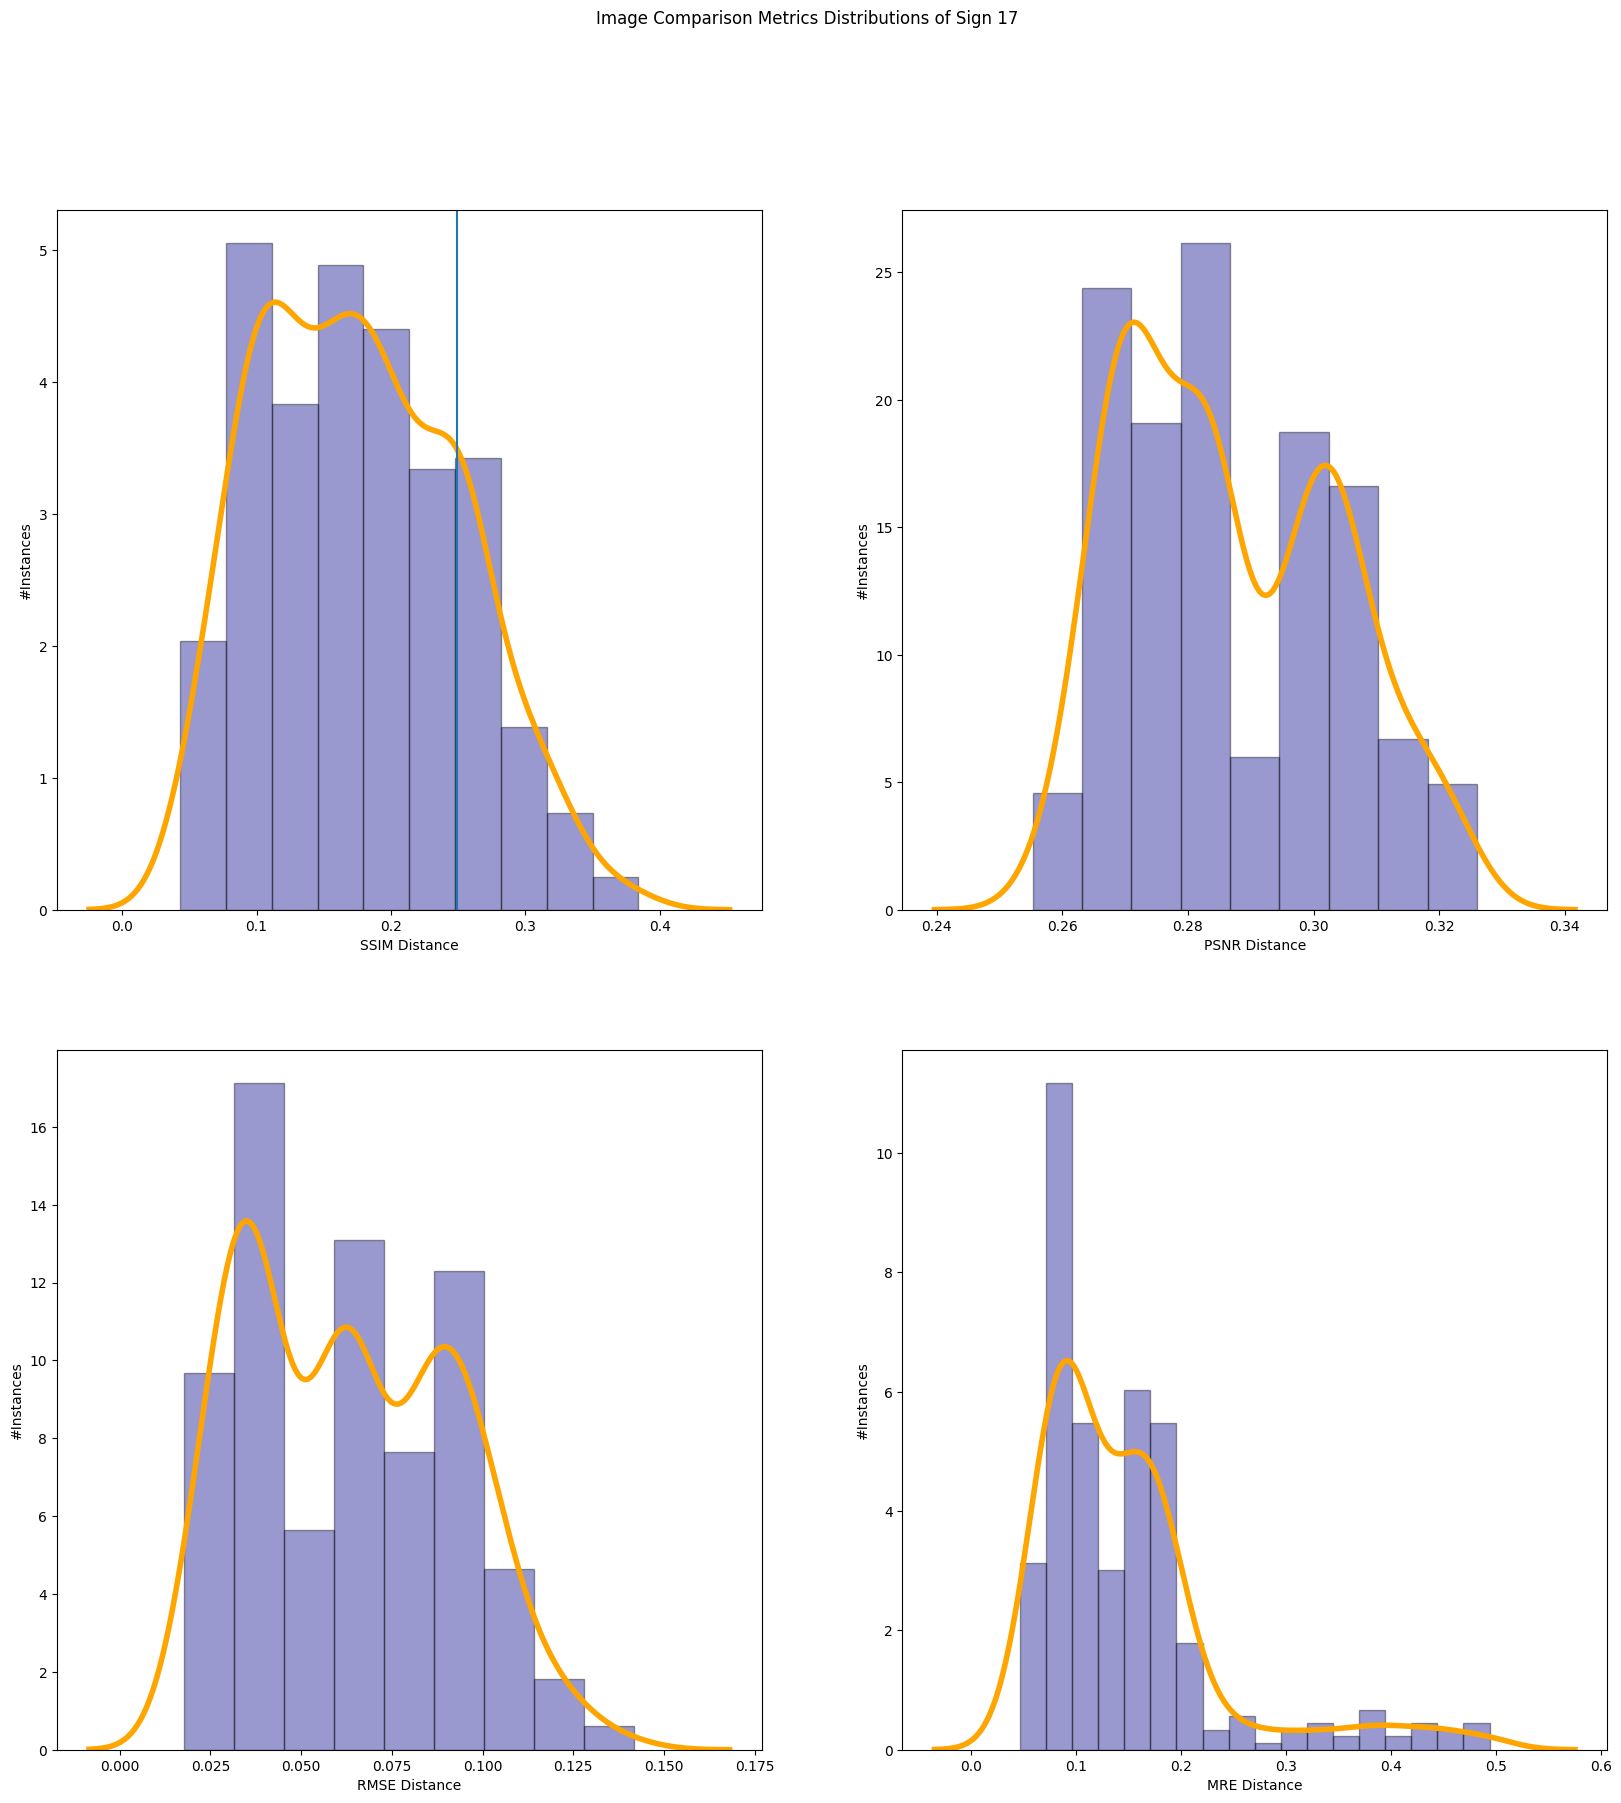

In [40]:
ssim17, psnr17, rmse17, mre17 = testset(test_path17, model_cropped_all)
visualize(ssim17, psnr17, rmse17, mre17,"17")
_,_,_,_ = testset(test_path17_dmg, model_cropped_all,True)

15/15 [==============================] - 0s 3ms/step
#Instances:  480
Destructor called, Employee deleted.
mean:  0.22587882559746503  std:  0.09537858403136054
1/1 [==============================] - 0s 69ms/step
Image 5.png ssim:  0.7046644985675812  psnr:  0.23978335810642618  rmse:  0.22351272404193878  mre:  2.3034708
Image 7.png ssim:  0.6747779548168182  psnr:  0.2402218687768076  rmse:  0.2206537127494812  mre:  1.3942436
Image 0.png ssim:  0.5618467032909393  psnr:  0.2432819740445006  rmse:  0.20169493556022644  mre:  0.9533067
Image 4.png ssim:  0.5735492408275604  psnr:  0.252787810680913  rmse:  0.152579203248024  mre:  0.31315938
Image 3.png ssim:  0.5936384201049805  psnr:  0.25049383126053154  rmse:  0.16320884227752686  mre:  0.2731108
Image 1.png ssim:  0.6870014071464539  psnr:  0.25950484930300244  rmse:  0.12527181208133698  mre:  0.27798378
Image 00008.png ssim:  0.2742069363594055  psnr:  0.26758620318244486  rmse:  0.09881342947483063  mre:  0.17840064
Image 9.pn

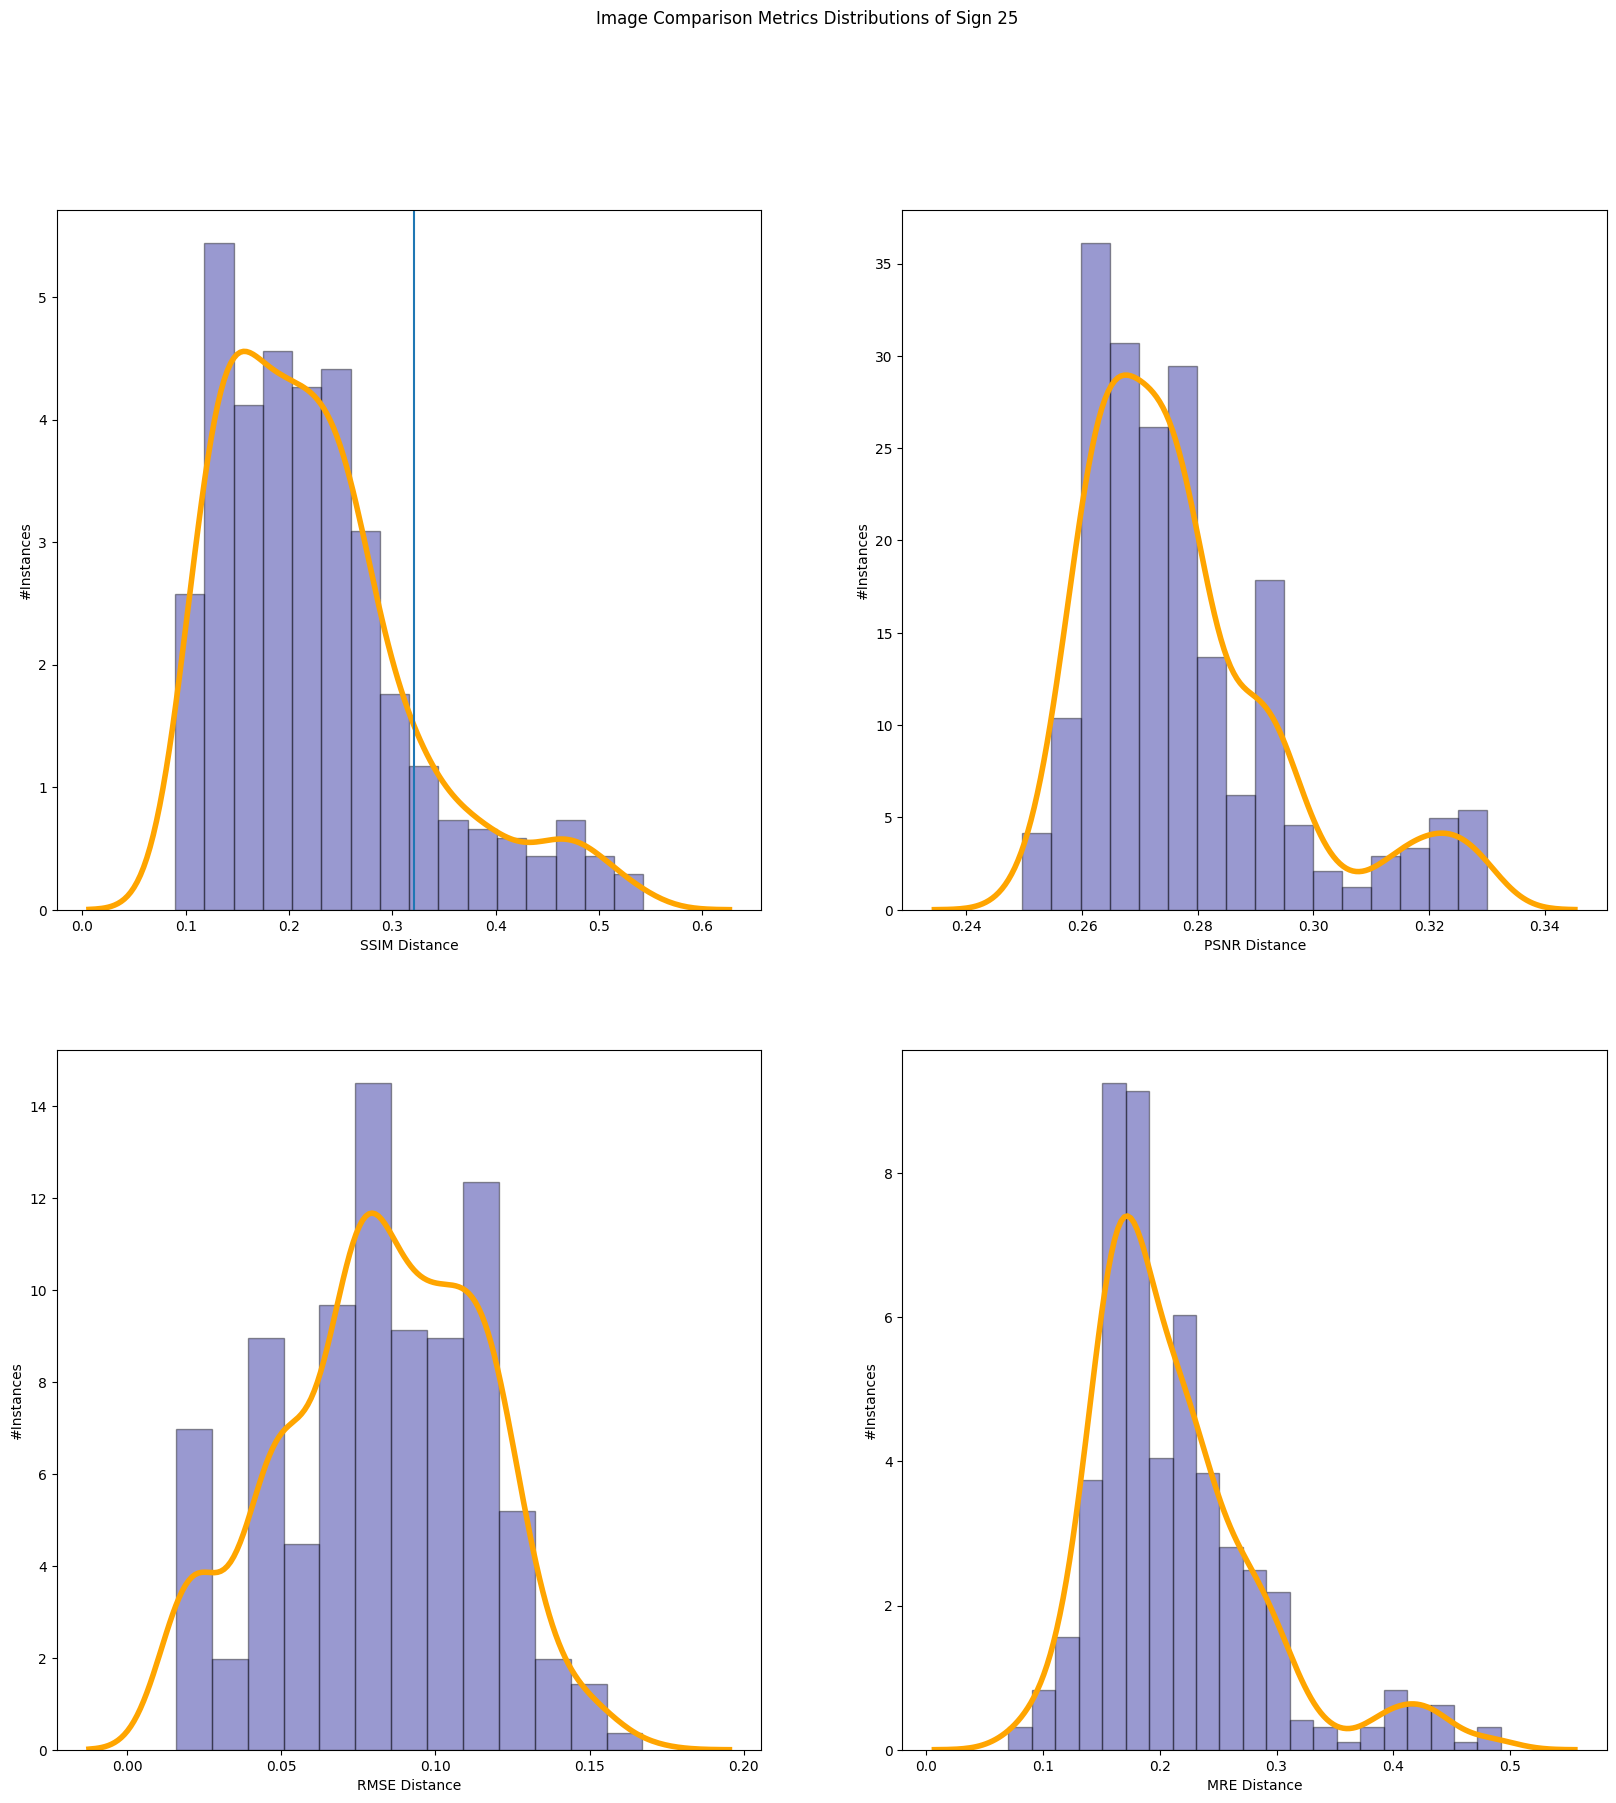

In [41]:
ssim25, psnr25, rmse25, mre25 = testset(test_path25, model_cropped_all)
visualize(ssim25, psnr25, rmse25, mre25,"25")
_,_,_,_ = testset(test_path25_dmg, model_cropped_all,True)

3/3 [==============================] - 0s 34ms/step
#Instances:  90
Destructor called, Employee deleted.
mean:  0.18700248069233363  std:  0.07441293231990458
1/1 [==============================] - 0s 69ms/step
Image 0.png ssim:  0.5635548532009125  psnr:  0.25611270081763177  rmse:  0.138389453291893  mre:  0.23059484
Image 3.png ssim:  0.6361554563045502  psnr:  0.24410873113893994  rmse:  0.19685831665992737  mre:  1.5228509
Image 1.png ssim:  0.6286792755126953  psnr:  0.24816070257448683  rmse:  0.1747797429561615  mre:  0.3849481
Image 2.png ssim:  0.5456630289554596  psnr:  0.2583131378772212  rmse:  0.12973210215568542  mre:  0.34266084
Destructor called, Employee deleted.


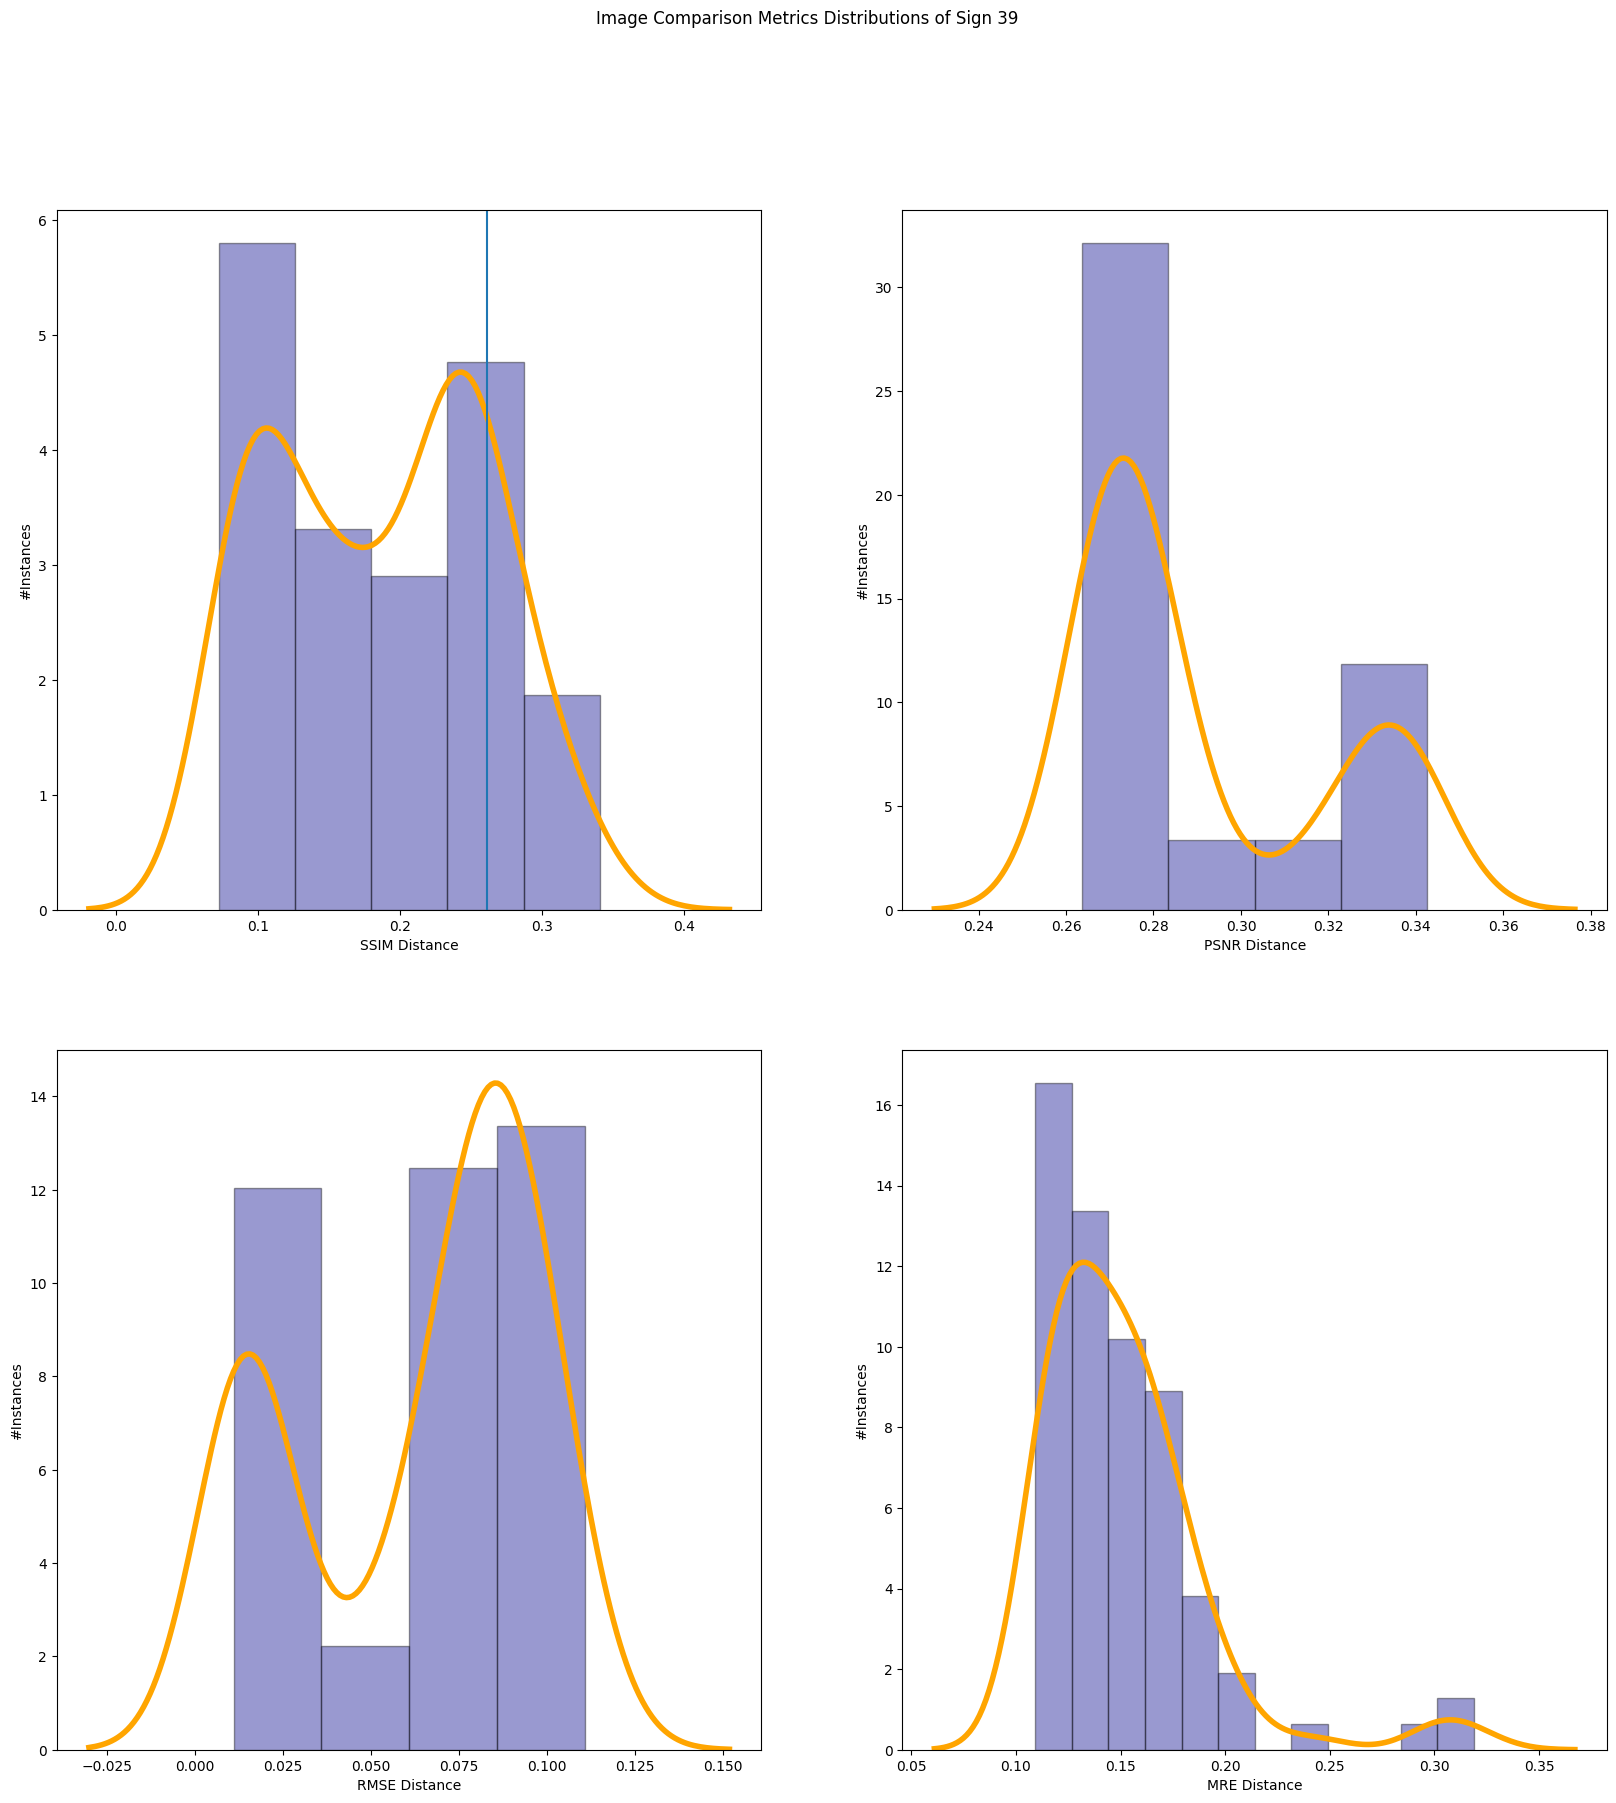

In [42]:
ssim39, psnr39, rmse39, mre39 = testset(test_path39, model_cropped_all)
visualize(ssim39, psnr39, rmse39, mre39,"39")
_,_,_,_ = testset(test_path39_dmg, model_cropped_all,True)